# Algoritmo para calcular la DFT

### Consignas de la tarea semanal
***
Desarrollar un algoritmo que calcule la transformada discreta de Fourier (DFT).

\begin{equation}
\sum_{n=0}^{N-1}X_n.e^{-j2\pi.k.n/N}
\end{equation}

 `XX = mi_funcion_DFT( xx )`

**xx**: señal a analizar, una matriz (Nx1) de números reales.

**XX**: DFT de xx, una matriz (Nx1) de números complejos.


Ayuda:

+ Tienen las clases grabadas y un video mío con una explicación 



In [8]:
from IPython.display import HTML

# Youtube
HTML('<iframe width="731" height="411" src="https://www.youtube.com/embed/kjRkHIeb5eI" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

+ Aprovechando que tenemos un generador de senoidales funcionando, y recordando que la DFT de una senoidal de frecuencia f0, será una delta de Kronecker posicionada en la frecuencia f0. Validen sus funciones con esta experiencia.

Bonus:
💎 Probar las mismas experiencias con la transformada rápida de Fourier (DFT rápida se llama FFT).
🤯 Calcular la DFT de una señal aleatoria, por ejemplo ruido uniforme de varianza σ² = 4. Pueden encontrar cómo depende la varianza de los parámetros de la distribución aquí.

***

### Solucion propuesta:
***
##### Modulos utilizados:

In [15]:
import numpy as np
import matplotlib.pyplot as plt

##### Funcion requerida:

***

In [16]:
def signal_generator( vmax = 1, dc = 0, ff = 1, ph=0, nn = 1, fs = 1, signal='senoidal'):
    
    ts = 1/fs
    
    tt = np.linspace(0, (nn-1)*ts, nn).flatten()
    
    x = np.array([], dtype=np.float).reshape(nn,0)
    
    if signal == 'senoidal':
        
        aux = vmax * np.sin(2*np.pi*ff*tt + ph) + dc
        x = np.hstack([x, aux.reshape(nn,1)] )
        
    elif signal == 'ruido':
        x = np.random.random_sample((nn,))
    
    return tt, x

def DFT(xx):
    
    N = len(xx)
    n = np.arange(N)
    k = n.reshape(N,1)
    e = np.exp(-2j * np.pi * k * n/N)
   
    x = np.dot(e, xx)
    
    return x

##### Ejemplo de utilizacion:

***

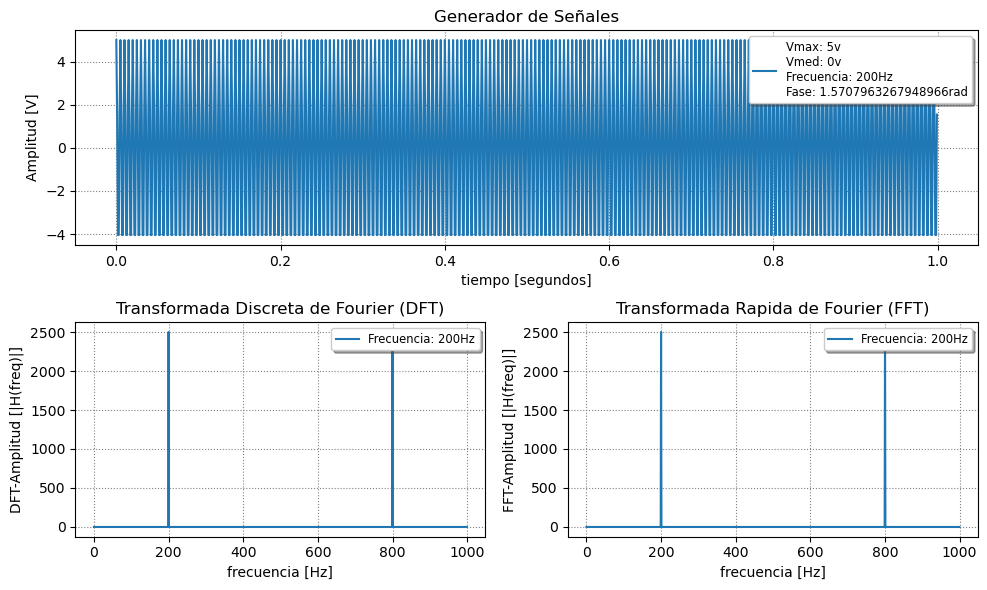

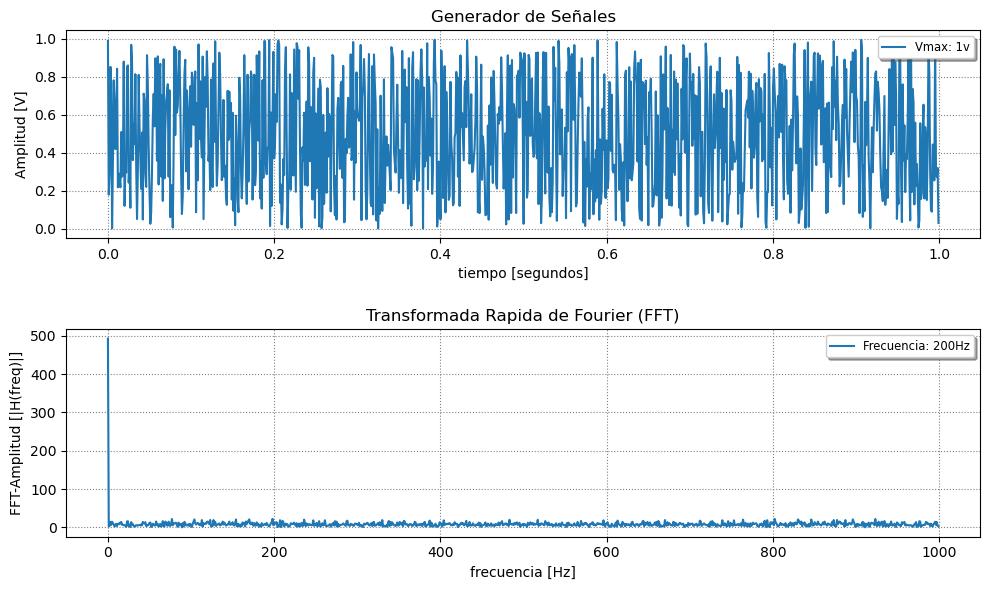

In [18]:
fig1 = plt.figure(1, figsize=(10, 6), dpi=100)

fig1.add_subplot(2,2,(1, 2))

ff = 200
fs = 1000
nn = 1000
vmax = 5
dc = 0
ph = (np.pi)/2
tipo_sg = 'senoidal'

tt1, xx1 = signal_generator(vmax, dc, ff, ph, nn, fs, tipo_sg)

line_hdls = plt.plot(tt1, xx1, label=f"Vmax: {vmax}v\nVmed: {dc}v\nFrecuencia: {ff}Hz\nFase: {ph}rad")
plt.grid(color='gray', linestyle='dotted', linewidth=0.8)
plt.title('Generador de Señales')
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')
plt.legend(loc='upper right', shadow=True, fontsize='small')

#%%
fig1.add_subplot(2,2,3)

x_dft = DFT(xx1)

N = len(x_dft) 
n=np.arange(N)   
T = N/fs
freq = n/T

line_hdls = plt.plot(freq, abs(x_dft), label=f"Frecuencia: {ff}Hz")
plt.grid(color='gray', linestyle='dotted', linewidth=0.8)
plt.title('Transformada Discreta de Fourier (DFT)')
plt.xlabel('frecuencia [Hz]')
plt.ylabel('DFT-Amplitud [|H(freq)|]')
plt.legend(loc='upper right', shadow=True, fontsize='small')

#%%
fig1.add_subplot(2,2,4)

x_fft = np.fft.fft(xx1)

line_hdls = plt.plot(freq, abs(x_dft), label=f"Frecuencia: {ff}Hz")
plt.grid(color='gray', linestyle='dotted', linewidth=0.8)
plt.title('Transformada Rapida de Fourier (FFT)')
plt.xlabel('frecuencia [Hz]')
plt.ylabel('FFT-Amplitud [|H(freq)|]')
plt.legend(loc='upper right', shadow=True, fontsize='small')

plt.tight_layout(h_pad=1.0)

#%%
fig2 = plt.figure(2, figsize=(10, 6), dpi=100)
fig2.add_subplot(2,1,1)

tt2, xx2 = signal_generator(nn=nn, fs=fs, signal='ruido')

line_hdls = plt.plot(tt2, xx2, label="Vmax: 1v")
plt.grid(color='gray', linestyle='dotted', linewidth=0.8)
plt.title('Generador de Señales' )
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')
plt.legend(loc='upper right', shadow=True, fontsize='small')

fig2.add_subplot(2,1,2)

x2_dft = DFT(xx2)

N = len(x_dft) 
n=np.arange(N)   
T = N/fs
freq2 = n/T

line_hdls = plt.plot(freq2, abs(x2_dft), label=f"Frecuencia: {ff}Hz")
plt.grid(color='gray', linestyle='dotted', linewidth=0.8)
plt.title('Transformada Rapida de Fourier (FFT)')
plt.xlabel('frecuencia [Hz]')
plt.ylabel('FFT-Amplitud [|H(freq)|]')
plt.legend(loc='upper right', shadow=True, fontsize='small')

plt.tight_layout(h_pad=2.0)
#%%
plt.show()
